# 텍스트와 시퀀스를 위한 딥러닝
텍스트(단어의 시퀀스 또는 문자의 시퀀스), 시계열 또는 일반적인 시퀀스(sequence) 데이터를 처리할 수 있는 딥러닝 모델  
- 순환 신경망(RNN, Recurrent Neural Network)
- Conv1D (1D 컨브넷)

## 텍스트 데이터 다루기
컴퓨터 비전이 픽셀에 적용한 패턴 인식(pattern recognition)인 것처럼, 자연어 처리(NLP)를 위한 딥러닝은 단어, 문장, 문단에 적용한 패턴 인식

텍스트 원본을 입력으로 사용하지 못하므로, 수치형 텐서로 변환하는 과정을 **텍스트 벡터화(vectorizing text)** 라고 함  
1. 텍스트 -> 단어 -> 벡터화
2. 텍스트 -> 문자 -> 벡터화
3. 텍스트 -> 단어 or 문자 -> n-gram 추출 -> 벡터화

텍스트를 나누는 단위(단어, 문자, n-gram)를 **토큰(token)** 이라 함  
-> 텍스트를 토큰으로 나누는 작업을 **토큰화(tokenization)** 라고 함  
- 원-핫 인코딩(one-hot encoding)
- 토큰 임베딩(token embeding)

### n-gram과 BoW
단어 n-그램(n-gram)은 문장에서 추출한 N개의 연속된 단어 그룹 (단어 대신 문자에도 사용 가능)  
`The cat sat on the mat`이라는 문장을 2-그램 집합으로 나타내면,  
```python
{"The", "The cate", "cat", "cat sat", ...}
```

3-그램 집합으로 나타내면,  
```python
{"The", "The cat", "cat", "cat sat", "The cat sat", ...}
```

이런 집합을 각각 2-그램 가방(bag of 2-gram) 또는 3-그램 가방(bag of 3-gram)이라고 함  
가방(bag)이란 용어는 다루고자하는 것이 리스트나 시퀀스가 아니라 토큰의 집합이라는 사실을 의미  
-> 이 토큰에는 특정한 순서가 없음 -> BoW(Bag-of-Words) 토큰화 방식

BoW가 순서가 없는 토큰화 방법(생성된 토큰이 시퀀스가 아니라 집합으로 간주되기 때문)이기 때문에 딥러닝 모델보다는 얕은 학습 방법의 언어 처리 모델에 사용되는 경향이 있음

### 단어와 문자의 원-핫 인코딩
토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법

In [1]:
# 단어 수준의 원-핫 인코딩
import numpy as np

samples = ["The cat sat on the mat.", "The dog ate my homework."]

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index)+1 # 단어마다 고유 인덱스 할당

max_length = 10

results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values())+1
                          )
                   )
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        idx = token_index.get(word)
        results[i, j, idx] = 1.

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [3]:
# 문자 수준 원-핫 인코딩
import string

samples = ["The cat sat on the mat.", "The dog ate my homework."]
characters = string.printable # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        idx = token_index.get(character)
        results[i, j, idx] = 1.

In [4]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [5]:
# 케라스를 사용한 단어 수준의 원-핫 인코딩
from keras.preprocessing.text import Tokenizer

samples = ["The cat sat on the mat.", "The dog ate my homework."]

tokenizer = Tokenizer(num_words=1000) # 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듬
tokenizer.fit_on_texts(samples) # 단어 인덱스 구축

seq = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환
one_hot_results = tokenizer.texts_to_matrix(samples, mode="binary")

word_index = tokenizer.word_index

len(word_index)

c:\Users\spec3\anaconda3\envs\dgdg\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


9

원-핫 인코딩의 변종 중 하나는 **원-핫 해싱(one-hot hashing)** 기법  
-> 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용  
-> 각 단어에 명시적으로 인덱스를 할당하고, 단어를 해싱해 **고정된 크기의 벡터** 로 변환

해시 충돌(hash collision)이 발생하면, 머신 러닝 모델은 단어 사이의 차이를 인식하지 못함

In [6]:
# 해싱 기법을 사용한 단어 수준의 원-핫 인코딩
samples = ["The cat sat on the mat.", "The dog ate my homework."]

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        idx = abs(hash(word))%dimensionality
        results[i, j, idx] = 1.

In [7]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### 단어 임베딩
단어와 벡터를 연관 짓는 강력하고 인기있는 또 다른 방법  
- 원-핫 인코딩으로 만든 벡터는 희소(sparse)하고 대부분 0으로 채워진 고차원
- 단어 임베딩은 저차원의 실수형 벡터 (희소 벡터의 반대인 밀집 벡터)
- 단어 임베딩은 데이터로부터 학습 됨

#### Embedding 층을 사용해 단어 임베딩 학습
관심 대상인 문제와 함께 단어 임베딩을 학습  
-> 랜덤한 단어 벡터로 시작해 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습

단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것  
-> 임베딩 공간이 구조적이지 않다는 문제점  
-> `accurate`와 `exact`는 문장에서 비슷한 의미로 사용되지만 완전히 다른 임베딩을 갖음

단어 벡터 사이에 좀 더 추상적이고 기하학적인 관계를 얻으려면 단어 사이에 있는 의미 관계를 반영해야 함  
-> 단어 임베딩은 언어를 기하학적인 공간에 매핑하는 것  
-> 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 임베딩 됨  
-> 거리, 방향 등의 의미를 가질 수 있음

In [8]:
from keras.layers import Embedding

embegging_layer = Embedding(1000, 64)

임베딩층은 특정 단어를 나타내는 정수 인덱스를 밀집 벡터토 매핑하는 딕셔너리로 이해하면 됨  

단어 인덱스 -> Embedding 층 -> 연관된 단어 벡터

##### 입력
`(samples, sequence_length)`인 2D 정수 텐서를 입력으로 받음  
-> 배치에 있는 모든 시퀀스의 길이는 같아야하므로, 패딩되거나 잘림  

##### 출력
`(samples, sequence_length, embedding_dimensionality)`인 3D 실수형 텐서를 반환함  
-> RNN 층이나 1D Conv 층에서 처리

임베딩 층의 객체를 생성할 때, 가중치는 다른 층과 마찬가지로 랜덤하게 초기화

In [9]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# List -> 2D Tensor
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
# 로드한 데이터에 임베딩 층과 분류기 사용
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # out: (samples, maxlen, 8)

model.add(Flatten()) # out: (samples, maxlen*8)

model.add(Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [12]:
import tensorflow as tf

with tf.device(":/GPU:0"):
    hist = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=32,
                     validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6616 - acc: 0.6467 - val_loss: 0.6043 - val_acc: 0.7042
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5287 - acc: 0.7575 - val_loss: 0.5194 - val_acc: 0.7336
Epoch 3/10
625/625 [==============================] - 1s 986us/step - loss: 0.4563 - acc: 0.7890 - val_loss: 0.4976 - val_acc: 0.7488
Epoch 4/10
625/625 [==============================] - 1s 914us/step - loss: 0.4204 - acc: 0.8082 - val_loss: 0.4937 - val_acc: 0.7542
Epoch 5/10
625/625 [==============================] - 1s 917us/step - loss: 0.3960 - acc: 0.8230 - val_loss: 0.4959 - val_acc: 0.7572
Epoch 6/10
625/625 [==============================] - 1s 946us/step - loss: 0.3764 - acc: 0.8353 - val_loss: 0.4984 - val_acc: 0.7588
Epoch 7/10
625/625 [==============================] - 1s 938us/step - loss: 0.3581 - acc: 0.8466 - val_loss: 0.5051 - val_acc: 0.7584
Epoch 8/10
625/625 [==============================] - 1s 925us/ste

임베딩 시퀀스를 펼치고 하나의 `Dense` 층을 훈련했으므로, 입력 시퀀스에 있는 각 단어를 독립적으로 다루었음  
-> 단어 사이의 관계나 문장 구조를 고려하지 않음  

각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위에 순환층이나 1D Conv층을 추가하는 것이 좋음

#### 사전 훈련된 단어 임베딩 사용하기
풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드  
-> 사전 훈련된 단어 임베딩(pretrained word embedding)  
-> 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요한 경우  

### 원본 텍스트에서 단어 임베딩까지
##### IMDB 원본 데이터 전처리

In [13]:
import os

imdb_dir = "./raw_imdb/"
train_dir = os.path.join(imdb_dir)

labels = []
texts = []

In [14]:
for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:]==".txt":
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type=="neg": labels.append(0)
            else: labels.append(1)

##### 데이터 토큰화
200개의 샘플을 학습한 후 영화 리뷰를 분류

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f"{len(word_index)}개의 고유한 토큰!")

data = pad_sequences(seq, maxlen=maxlen)
labels = np.asarray(labels)
print(f"Data Tensor: {data.shape}")
print(f"Label Tensor: {labels.shape}")

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

72633개의 고유한 토큰!
Data Tensor: (17243, 100)
Label Tensor: (17243,)


##### GloVe 단어 임베딩
[GloVe | 영문 위키피디아를 사용한 임베딩](https://nlp.stanford.edu/projects/glove/)  
단어의 동시 출현(co-occurence) 통계를 기록한 행렬을 분해하는 기법을 사용

In [16]:
glove_dir = "./raw_imdb/"

embeddings_index = {}
f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print(f"{len(embeddings_index)}개의 단어 벡터")

400000개의 단어 벡터


In [17]:
# GloVe 단어 임베딩 행렬
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

##### 모델 정의

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


##### 모델에 GloVe 임베딩 로드 후 훈련 및 평가

In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [21]:
import tensorflow as tf

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

with tf.device(":/GPU:0"):
    hist = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Epoch 1/10
7/7 [==============================] - 12s 2s/step - loss: 1.7351 - acc: 0.6000 - val_loss: 0.7479 - val_acc: 0.4781
Epoch 2/10
7/7 [==============================] - 11s 2s/step - loss: 0.4214 - acc: 0.8100 - val_loss: 0.7850 - val_acc: 0.7227
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.2604 - acc: 0.8900 - val_loss: 0.8661 - val_acc: 0.7230
Epoch 4/10
7/7 [==============================] - 11s 2s/step - loss: 0.1078 - acc: 0.9900 - val_loss: 0.6758 - val_acc: 0.6047
Epoch 5/10
7/7 [==============================] - 11s 2s/step - loss: 0.1534 - acc: 0.9650 - val_loss: 1.4164 - val_acc: 0.3086
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.1649 - acc: 0.9150 - val_loss: 0.6836 - val_acc: 0.7186
Epoch 7/10
7/7 [==============================] - 11s 2s/step - loss: 0.0338 - acc: 1.0000 - val_loss: 0.7925 - val_acc: 0.7225
Epoch 8/10
7/7 [==============================] - 11s 2s/step - loss: 0.0228 - acc: 1.0000 - val_loss: 0

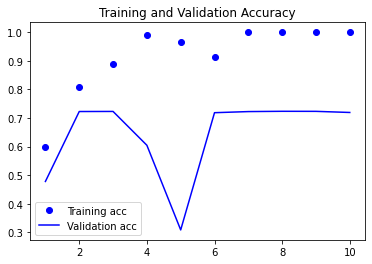

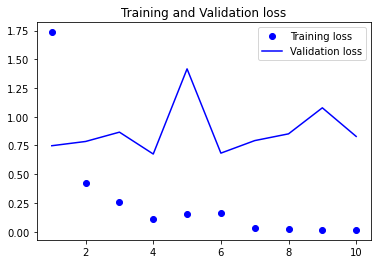

In [22]:
import matplotlib.pyplot as plt

acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

#### 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련하기

In [23]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

with tf.device(":/GPU:0"):
    hist = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 0.6428 - acc: 0.6900 - val_loss: 0.6124 - val_acc: 0.7227
Epoch 2/10
7/7 [==============================] - 10s 2s/step - loss: 0.3631 - acc: 0.8550 - val_loss: 0.6041 - val_acc: 0.7228
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.1963 - acc: 0.9850 - val_loss: 0.6137 - val_acc: 0.7228
Epoch 4/10
7/7 [==============================] - 10s 2s/step - loss: 0.0821 - acc: 1.0000 - val_loss: 0.6333 - val_acc: 0.7228
Epoch 5/10
7/7 [==============================] - 10s 2s/step - loss: 0.0368 - acc: 1.0000 - val_loss: 0.6514 - val_acc: 0.7231
Epoch 6/10
7/7 [==============================] - 10s 2s/step - loss: 0.0186 - acc: 1.0000 - val_loss: 0.6543 - val_acc: 0.7232
Epoch 7/10
7/7 [==============================] - 10s 2s/step - loss: 0.0101 - acc: 1.0000 - val_loss: 0.6570 - val_acc: 0.7232
Epoch 8/10
7/7 [==============================] - 10s 2s/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0

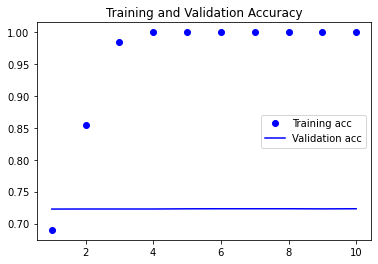

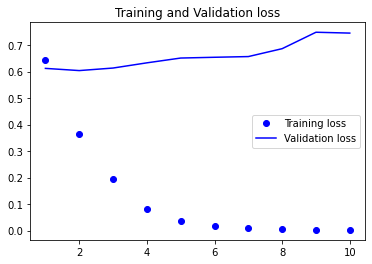

In [25]:
acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

### 정리
- 원본 텍스트를 신경망이 처리할 수 있는 형태로 변환
- Embedding 층을 추가해, 어떤 작업에 특화된 토큰 임베딩을 학습
- 데이터가 부족한 자연어 처리 문제에서 사전 훈련된 단어 임베딩을 사용해 성능 향상을 도모